In [1]:
import pandas as pd


df_pre = pd.read_csv('wine.csv', header=None)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt 
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15)

print(df.shape)
df.head()

(975, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,7.199282,0.343979,0.315826,5.333128,0.058434,29.940513,113.162051,0.994687,3.219303,0.532615,10.473316,5.800000,0.264615
std,1.225679,0.161031,0.144833,4.811715,0.040195,17.127078,55.815845,0.003052,0.159532,0.156318,1.234354,0.876337,0.441355
min,4.700000,0.080000,0.000000,0.700000,0.009000,3.000000,6.000000,0.987220,2.790000,0.230000,8.400000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,73.500000,0.992245,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.800000,0.047000,28.000000,115.000000,0.995000,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,7.700000,0.068500,41.000000,153.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,14.300000,1.090000,0.990000,31.600000,0.415000,128.000000,289.000000,1.010300,3.780000,1.980000,14.000000,9.000000,1.000000


In [4]:
df.values

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [5]:
X = df.values[:,0:12]
Y = df.values[:,12]

In [6]:
# 모델의 설정(구조 짜기)
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# 모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 저장 폴더 지정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 방법
# 함수 안에서 함수를 부를 때 callback 함수 사용
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)



history = model.fit(X, Y, validation_split=0.33, epochs=1500, batch_size=500)
model.summary()

Epoch 1/1500
2/2 [==============================] - 1s 571ms/step - loss: 2.0445 - accuracy: 0.7266 - val_loss: 1.3696 - val_accuracy: 0.7547
Epoch 2/1500
2/2 [==============================] - 0s 25ms/step - loss: 1.6065 - accuracy: 0.7193 - val_loss: 0.9768 - val_accuracy: 0.7547
Epoch 3/1500
2/2 [==============================] - 0s 24ms/step - loss: 1.1012 - accuracy: 0.7286 - val_loss: 0.6556 - val_accuracy: 0.7547
Epoch 4/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.7096 - accuracy: 0.7269 - val_loss: 0.7205 - val_accuracy: 0.6429
Epoch 5/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.7508 - accuracy: 0.5977 - val_loss: 0.8499 - val_accuracy: 0.4472
Epoch 6/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.8011 - accuracy: 0.5145 - val_loss: 0.5612 - val_accuracy: 0.7236
Epoch 7/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.5679 - accuracy: 0.7158 - val_loss: 0.4968 - val_accuracy: 0.7516
Epoch 8/1500

Epoch 59/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2574 - accuracy: 0.9230 - val_loss: 0.2214 - val_accuracy: 0.9037
Epoch 60/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.2594 - accuracy: 0.9176 - val_loss: 0.2212 - val_accuracy: 0.9037
Epoch 61/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2575 - accuracy: 0.9189 - val_loss: 0.2193 - val_accuracy: 0.9037
Epoch 62/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2582 - accuracy: 0.9216 - val_loss: 0.2175 - val_accuracy: 0.9068
Epoch 63/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.2568 - accuracy: 0.9223 - val_loss: 0.2162 - val_accuracy: 0.9068
Epoch 64/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.2586 - accuracy: 0.9210 - val_loss: 0.2153 - val_accuracy: 0.9068
Epoch 65/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2553 - accuracy: 0.9216 - val_loss: 0.2145 - val_accuracy: 0.9099
Epoch 

2/2 [==============================] - 0s 22ms/step - loss: 0.2244 - accuracy: 0.9267 - val_loss: 0.2006 - val_accuracy: 0.9130
Epoch 117/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2212 - accuracy: 0.9287 - val_loss: 0.1997 - val_accuracy: 0.9130
Epoch 118/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2220 - accuracy: 0.9267 - val_loss: 0.2000 - val_accuracy: 0.9130
Epoch 119/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.2282 - accuracy: 0.9260 - val_loss: 0.2003 - val_accuracy: 0.9130
Epoch 120/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2255 - accuracy: 0.9260 - val_loss: 0.2002 - val_accuracy: 0.9161
Epoch 121/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.2260 - accuracy: 0.9273 - val_loss: 0.1998 - val_accuracy: 0.9161
Epoch 122/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.2216 - accuracy: 0.9267 - val_loss: 0.1997 - val_accuracy: 0.9161
Epoch 123/1500

2/2 [==============================] - 0s 21ms/step - loss: 0.2020 - accuracy: 0.9301 - val_loss: 0.1973 - val_accuracy: 0.9224
Epoch 174/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.2024 - accuracy: 0.9294 - val_loss: 0.1918 - val_accuracy: 0.9286
Epoch 175/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1992 - accuracy: 0.9260 - val_loss: 0.1858 - val_accuracy: 0.9286
Epoch 176/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.2002 - accuracy: 0.9260 - val_loss: 0.1830 - val_accuracy: 0.9255
Epoch 177/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1971 - accuracy: 0.9273 - val_loss: 0.1830 - val_accuracy: 0.9255
Epoch 178/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1998 - accuracy: 0.9290 - val_loss: 0.1856 - val_accuracy: 0.9286
Epoch 179/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1931 - accuracy: 0.9300 - val_loss: 0.1903 - val_accuracy: 0.9255
Epoch 180/1500

2/2 [==============================] - 0s 22ms/step - loss: 0.1755 - accuracy: 0.9493 - val_loss: 0.1779 - val_accuracy: 0.9441
Epoch 231/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.1767 - accuracy: 0.9466 - val_loss: 0.1686 - val_accuracy: 0.9472
Epoch 232/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.1728 - accuracy: 0.9463 - val_loss: 0.1629 - val_accuracy: 0.9472
Epoch 233/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1745 - accuracy: 0.9415 - val_loss: 0.1620 - val_accuracy: 0.9441
Epoch 234/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1696 - accuracy: 0.9398 - val_loss: 0.1647 - val_accuracy: 0.9472
Epoch 235/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1767 - accuracy: 0.9439 - val_loss: 0.1732 - val_accuracy: 0.9503
Epoch 236/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1733 - accuracy: 0.9503 - val_loss: 0.1717 - val_accuracy: 0.9503
Epoch 237/1500

2/2 [==============================] - 0s 20ms/step - loss: 0.1467 - accuracy: 0.9554 - val_loss: 0.1528 - val_accuracy: 0.9565
Epoch 288/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1500 - accuracy: 0.9534 - val_loss: 0.1483 - val_accuracy: 0.9565
Epoch 289/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1497 - accuracy: 0.9517 - val_loss: 0.1432 - val_accuracy: 0.9503
Epoch 290/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1417 - accuracy: 0.9533 - val_loss: 0.1443 - val_accuracy: 0.9565
Epoch 291/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1461 - accuracy: 0.9530 - val_loss: 0.1506 - val_accuracy: 0.9565
Epoch 292/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1453 - accuracy: 0.9547 - val_loss: 0.1501 - val_accuracy: 0.9565
Epoch 293/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.1454 - accuracy: 0.9530 - val_loss: 0.1430 - val_accuracy: 0.9503
Epoch 294/1500

2/2 [==============================] - 0s 23ms/step - loss: 0.1280 - accuracy: 0.9622 - val_loss: 0.1287 - val_accuracy: 0.9596
Epoch 345/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.1330 - accuracy: 0.9544 - val_loss: 0.1283 - val_accuracy: 0.9596
Epoch 346/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1297 - accuracy: 0.9564 - val_loss: 0.1306 - val_accuracy: 0.9627
Epoch 347/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1257 - accuracy: 0.9635 - val_loss: 0.1407 - val_accuracy: 0.9534
Epoch 348/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1312 - accuracy: 0.9726 - val_loss: 0.1370 - val_accuracy: 0.9596
Epoch 349/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.1233 - accuracy: 0.9706 - val_loss: 0.1264 - val_accuracy: 0.9627
Epoch 350/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1256 - accuracy: 0.9577 - val_loss: 0.1262 - val_accuracy: 0.9627
Epoch 351/1500

2/2 [==============================] - 0s 23ms/step - loss: 0.1143 - accuracy: 0.9679 - val_loss: 0.1278 - val_accuracy: 0.9596
Epoch 402/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1179 - accuracy: 0.9716 - val_loss: 0.1244 - val_accuracy: 0.9627
Epoch 403/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.1140 - accuracy: 0.9736 - val_loss: 0.1186 - val_accuracy: 0.9627
Epoch 404/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.1151 - accuracy: 0.9645 - val_loss: 0.1182 - val_accuracy: 0.9627
Epoch 405/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1164 - accuracy: 0.9605 - val_loss: 0.1194 - val_accuracy: 0.9627
Epoch 406/1500
2/2 [==============================] - 0s 20ms/step - loss: 0.1195 - accuracy: 0.9625 - val_loss: 0.1222 - val_accuracy: 0.9627
Epoch 407/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1096 - accuracy: 0.9713 - val_loss: 0.1194 - val_accuracy: 0.9627
Epoch 408/1500

2/2 [==============================] - 0s 22ms/step - loss: 0.1061 - accuracy: 0.9693 - val_loss: 0.1111 - val_accuracy: 0.9627
Epoch 459/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.1018 - accuracy: 0.9669 - val_loss: 0.1117 - val_accuracy: 0.9627
Epoch 460/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1067 - accuracy: 0.9716 - val_loss: 0.1191 - val_accuracy: 0.9658
Epoch 461/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1082 - accuracy: 0.9693 - val_loss: 0.1134 - val_accuracy: 0.9627
Epoch 462/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1030 - accuracy: 0.9719 - val_loss: 0.1106 - val_accuracy: 0.9627
Epoch 463/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.1089 - accuracy: 0.9659 - val_loss: 0.1110 - val_accuracy: 0.9627
Epoch 464/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.1051 - accuracy: 0.9693 - val_loss: 0.1130 - val_accuracy: 0.9627
Epoch 465/1500

2/2 [==============================] - 0s 21ms/step - loss: 0.0945 - accuracy: 0.9723 - val_loss: 0.1082 - val_accuracy: 0.9627
Epoch 516/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0935 - accuracy: 0.9713 - val_loss: 0.1066 - val_accuracy: 0.9658
Epoch 517/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0977 - accuracy: 0.9679 - val_loss: 0.1088 - val_accuracy: 0.9627
Epoch 518/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0960 - accuracy: 0.9713 - val_loss: 0.1120 - val_accuracy: 0.9658
Epoch 519/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.1075 - val_accuracy: 0.9658
Epoch 520/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0950 - accuracy: 0.9706 - val_loss: 0.1057 - val_accuracy: 0.9627
Epoch 521/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0938 - accuracy: 0.9699 - val_loss: 0.1076 - val_accuracy: 0.9658
Epoch 522/1500

2/2 [==============================] - 0s 22ms/step - loss: 0.0845 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy: 0.9627
Epoch 573/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0838 - accuracy: 0.9774 - val_loss: 0.1070 - val_accuracy: 0.9627
Epoch 574/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0909 - accuracy: 0.9754 - val_loss: 0.1024 - val_accuracy: 0.9658
Epoch 575/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0852 - accuracy: 0.9750 - val_loss: 0.1000 - val_accuracy: 0.9658
Epoch 576/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0866 - accuracy: 0.9699 - val_loss: 0.1030 - val_accuracy: 0.9658
Epoch 577/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.1090 - val_accuracy: 0.9596
Epoch 578/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.1005 - val_accuracy: 0.9658
Epoch 579/1500

2/2 [==============================] - 0s 22ms/step - loss: 0.0799 - accuracy: 0.9760 - val_loss: 0.0977 - val_accuracy: 0.9658
Epoch 630/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0750 - accuracy: 0.9780 - val_loss: 0.0984 - val_accuracy: 0.9658
Epoch 631/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0757 - accuracy: 0.9787 - val_loss: 0.1026 - val_accuracy: 0.9627
Epoch 632/1500
2/2 [==============================] - 0s 19ms/step - loss: 0.0821 - accuracy: 0.9720 - val_loss: 0.0985 - val_accuracy: 0.9658
Epoch 633/1500
2/2 [==============================] - 0s 20ms/step - loss: 0.0754 - accuracy: 0.9797 - val_loss: 0.0967 - val_accuracy: 0.9658
Epoch 634/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0777 - accuracy: 0.9750 - val_loss: 0.0996 - val_accuracy: 0.9658
Epoch 635/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.1070 - val_accuracy: 0.9627
Epoch 636/1500

2/2 [==============================] - 0s 23ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 687/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0719 - accuracy: 0.9739 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 688/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0746 - accuracy: 0.9770 - val_loss: 0.1120 - val_accuracy: 0.9689
Epoch 689/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0756 - accuracy: 0.9713 - val_loss: 0.0951 - val_accuracy: 0.9658
Epoch 690/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0715 - accuracy: 0.9760 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 691/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0739 - accuracy: 0.9716 - val_loss: 0.0934 - val_accuracy: 0.9658
Epoch 692/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0712 - accuracy: 0.9757 - val_loss: 0.1100 - val_accuracy: 0.9720
Epoch 693/1500

2/2 [==============================] - 0s 22ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0922 - val_accuracy: 0.9689
Epoch 744/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 745/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0646 - accuracy: 0.9774 - val_loss: 0.0965 - val_accuracy: 0.9689
Epoch 746/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0657 - accuracy: 0.9757 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 747/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0667 - accuracy: 0.9757 - val_loss: 0.0943 - val_accuracy: 0.9689
Epoch 748/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0653 - accuracy: 0.9760 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 749/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0650 - accuracy: 0.9740 - val_loss: 0.0967 - val_accuracy: 0.9720
Epoch 750/1500

2/2 [==============================] - 0s 23ms/step - loss: 0.0581 - accuracy: 0.9790 - val_loss: 0.0959 - val_accuracy: 0.9783
Epoch 801/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0632 - accuracy: 0.9754 - val_loss: 0.0987 - val_accuracy: 0.9814
Epoch 802/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 0.9767 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch 803/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0578 - accuracy: 0.9790 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 804/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0614 - accuracy: 0.9794 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 805/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0580 - accuracy: 0.9807 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 806/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0609 - accuracy: 0.9770 - val_loss: 0.0911 - val_accuracy: 0.9720
Epoch 807/1500

2/2 [==============================] - 0s 21ms/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0938 - val_accuracy: 0.9814
Epoch 858/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0584 - accuracy: 0.9760 - val_loss: 0.0894 - val_accuracy: 0.9720
Epoch 859/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 860/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0570 - accuracy: 0.9794 - val_loss: 0.0992 - val_accuracy: 0.9783
Epoch 861/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0548 - accuracy: 0.9774 - val_loss: 0.0907 - val_accuracy: 0.9720
Epoch 862/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0560 - accuracy: 0.9801 - val_loss: 0.0921 - val_accuracy: 0.9689
Epoch 863/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 864/1500

2/2 [==============================] - 0s 22ms/step - loss: 0.0544 - accuracy: 0.9770 - val_loss: 0.0942 - val_accuracy: 0.9720
Epoch 915/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0511 - accuracy: 0.9814 - val_loss: 0.0928 - val_accuracy: 0.9720
Epoch 916/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0509 - accuracy: 0.9807 - val_loss: 0.0965 - val_accuracy: 0.9752
Epoch 917/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0497 - accuracy: 0.9794 - val_loss: 0.1000 - val_accuracy: 0.9783
Epoch 918/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0525 - accuracy: 0.9790 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 919/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0515 - accuracy: 0.9824 - val_loss: 0.0923 - val_accuracy: 0.9720
Epoch 920/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0554 - accuracy: 0.9811 - val_loss: 0.0911 - val_accuracy: 0.9720
Epoch 921/1500

2/2 [==============================] - 0s 23ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0962 - val_accuracy: 0.9752
Epoch 972/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0476 - accuracy: 0.9784 - val_loss: 0.0961 - val_accuracy: 0.9752
Epoch 973/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0483 - accuracy: 0.9777 - val_loss: 0.0924 - val_accuracy: 0.9752
Epoch 974/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 975/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 0.0955 - val_accuracy: 0.9752
Epoch 976/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0468 - accuracy: 0.9774 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 977/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0916 - val_accuracy: 0.9752
Epoch 978/1500

2/2 [==============================] - 0s 24ms/step - loss: 0.0456 - accuracy: 0.9845 - val_loss: 0.0932 - val_accuracy: 0.9783
Epoch 1029/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0466 - accuracy: 0.9845 - val_loss: 0.0940 - val_accuracy: 0.9783
Epoch 1030/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0412 - accuracy: 0.9807 - val_loss: 0.0930 - val_accuracy: 0.9783
Epoch 1031/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0432 - accuracy: 0.9834 - val_loss: 0.0933 - val_accuracy: 0.9783
Epoch 1032/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0465 - accuracy: 0.9787 - val_loss: 0.0925 - val_accuracy: 0.9783
Epoch 1033/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0428 - accuracy: 0.9814 - val_loss: 0.0913 - val_accuracy: 0.9783
Epoch 1034/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0931 - val_accuracy: 0.9783
Epoch 10

Epoch 1085/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0519 - accuracy: 0.9821 - val_loss: 0.0966 - val_accuracy: 0.9783
Epoch 1086/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0436 - accuracy: 0.9828 - val_loss: 0.1046 - val_accuracy: 0.9752
Epoch 1087/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0472 - accuracy: 0.9797 - val_loss: 0.0955 - val_accuracy: 0.9783
Epoch 1088/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0428 - accuracy: 0.9831 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 1089/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.0935 - val_accuracy: 0.9752
Epoch 1090/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.1034 - val_accuracy: 0.9783
Epoch 1091/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0479 - accuracy: 0.9787 - val_loss: 0.0995 - val_accuracy:

Epoch 1142/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0396 - accuracy: 0.9845 - val_loss: 0.1007 - val_accuracy: 0.9783
Epoch 1143/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 0.9841 - val_loss: 0.0941 - val_accuracy: 0.9752
Epoch 1144/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 1145/1500
2/2 [==============================] - 0s 20ms/step - loss: 0.0480 - accuracy: 0.9821 - val_loss: 0.0940 - val_accuracy: 0.9783
Epoch 1146/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0409 - accuracy: 0.9851 - val_loss: 0.0986 - val_accuracy: 0.9814
Epoch 1147/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0412 - accuracy: 0.9824 - val_loss: 0.1108 - val_accuracy: 0.9752
Epoch 1148/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0491 - accuracy: 0.9824 - val_loss: 0.0933 - val_accuracy:

Epoch 1199/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.0943 - val_accuracy: 0.9752
Epoch 1200/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0394 - accuracy: 0.9848 - val_loss: 0.0948 - val_accuracy: 0.9783
Epoch 1201/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0404 - accuracy: 0.9848 - val_loss: 0.0953 - val_accuracy: 0.9783
Epoch 1202/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.0966 - val_accuracy: 0.9783
Epoch 1203/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0366 - accuracy: 0.9851 - val_loss: 0.1004 - val_accuracy: 0.9783
Epoch 1204/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0403 - accuracy: 0.9828 - val_loss: 0.0973 - val_accuracy: 0.9783
Epoch 1205/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0376 - accuracy: 0.9875 - val_loss: 0.0962 - val_accuracy:

Epoch 1256/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0987 - val_accuracy: 0.9783
Epoch 1257/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0359 - accuracy: 0.9868 - val_loss: 0.0998 - val_accuracy: 0.9783
Epoch 1258/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 0.9861 - val_loss: 0.0984 - val_accuracy: 0.9752
Epoch 1259/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.0978 - val_accuracy: 0.9752
Epoch 1260/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0370 - accuracy: 0.9845 - val_loss: 0.0986 - val_accuracy: 0.9783
Epoch 1261/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0358 - accuracy: 0.9855 - val_loss: 0.0986 - val_accuracy: 0.9783
Epoch 1262/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0370 - accuracy: 0.9845 - val_loss: 0.0982 - val_accuracy:

Epoch 1313/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0371 - accuracy: 0.9855 - val_loss: 0.0975 - val_accuracy: 0.9783
Epoch 1314/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0370 - accuracy: 0.9878 - val_loss: 0.0969 - val_accuracy: 0.9783
Epoch 1315/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0981 - val_accuracy: 0.9783
Epoch 1316/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0340 - accuracy: 0.9834 - val_loss: 0.1007 - val_accuracy: 0.9783
Epoch 1317/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0959 - val_accuracy: 0.9752
Epoch 1318/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0355 - accuracy: 0.9865 - val_loss: 0.0975 - val_accuracy: 0.9783
Epoch 1319/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0374 - accuracy: 0.9834 - val_loss: 0.0966 - val_accuracy:

Epoch 1370/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 0.9861 - val_loss: 0.1090 - val_accuracy: 0.9814
Epoch 1371/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0390 - accuracy: 0.9838 - val_loss: 0.0968 - val_accuracy: 0.9783
Epoch 1372/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.0973 - val_accuracy: 0.9814
Epoch 1373/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0370 - accuracy: 0.9828 - val_loss: 0.0954 - val_accuracy: 0.9783
Epoch 1374/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0322 - accuracy: 0.9851 - val_loss: 0.0985 - val_accuracy: 0.9783
Epoch 1375/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0327 - accuracy: 0.9868 - val_loss: 0.0972 - val_accuracy: 0.9783
Epoch 1376/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0326 - accuracy: 0.9861 - val_loss: 0.0946 - val_accuracy:

Epoch 1427/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.0960 - val_accuracy: 0.9783
Epoch 1428/1500
2/2 [==============================] - 0s 20ms/step - loss: 0.0280 - accuracy: 0.9892 - val_loss: 0.1029 - val_accuracy: 0.9783
Epoch 1429/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0345 - accuracy: 0.9861 - val_loss: 0.0974 - val_accuracy: 0.9783
Epoch 1430/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0307 - accuracy: 0.9885 - val_loss: 0.0955 - val_accuracy: 0.9783
Epoch 1431/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0307 - accuracy: 0.9878 - val_loss: 0.0963 - val_accuracy: 0.9783
Epoch 1432/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0309 - accuracy: 0.9889 - val_loss: 0.1005 - val_accuracy: 0.9752
Epoch 1433/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0324 - accuracy: 0.9882 - val_loss: 0.0968 - val_accuracy:

Epoch 1484/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 0.0997 - val_accuracy: 0.9783
Epoch 1485/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0279 - accuracy: 0.9878 - val_loss: 0.0988 - val_accuracy: 0.9783
Epoch 1486/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 0.9878 - val_loss: 0.0986 - val_accuracy: 0.9783
Epoch 1487/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.1016 - val_accuracy: 0.9783
Epoch 1488/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0291 - accuracy: 0.9889 - val_loss: 0.0994 - val_accuracy: 0.9783
Epoch 1489/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0976 - val_accuracy: 0.9814
Epoch 1490/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0295 - accuracy: 0.9892 - val_loss: 0.0962 - val_accuracy:

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
len(history.history['val_loss'])

1500

1500


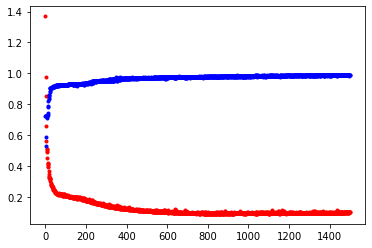

In [10]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
print(len(y_vloss))
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

In [11]:
# 모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
# 모델 저장 폴더 지정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 방법
# 함수 안에서 함수를 부를 때 callback 함수 사용
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 조기 종료
early_stpping_callback = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X, Y, validation_split=0.33, epochs=1500, batch_size=500, callbacks=[checkpointer,early_stpping_callback])
model.summary()

Epoch 1/1500
2/2 [==============================] - 0s 119ms/step - loss: 0.0440 - accuracy: 0.9848 - val_loss: 0.0979 - val_accuracy: 0.9783

Epoch 00001: val_loss improved from inf to 0.09786, saving model to ./model\01-0.0979.hdf5
Epoch 2/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0331 - accuracy: 0.9851 - val_loss: 0.1375 - val_accuracy: 0.9627

Epoch 00002: val_loss did not improve from 0.09786
Epoch 3/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0628 - accuracy: 0.9763 - val_loss: 0.0975 - val_accuracy: 0.9783

Epoch 00003: val_loss improved from 0.09786 to 0.09746, saving model to ./model\03-0.0975.hdf5
Epoch 4/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0299 - accuracy: 0.9878 - val_loss: 0.1022 - val_accuracy: 0.9814

Epoch 00004: val_loss did not improve from 0.09746
Epoch 5/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0411 - accuracy: 0.9831 - val_loss: 0.1011 - val_accuracy: 0.9814

E

2/2 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9902 - val_loss: 0.0978 - val_accuracy: 0.9814

Epoch 00042: val_loss did not improve from 0.09539
Epoch 43/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0256 - accuracy: 0.9912 - val_loss: 0.1003 - val_accuracy: 0.9783

Epoch 00043: val_loss did not improve from 0.09539
Epoch 44/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0294 - accuracy: 0.9882 - val_loss: 0.1021 - val_accuracy: 0.9783

Epoch 00044: val_loss did not improve from 0.09539
Epoch 45/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0291 - accuracy: 0.9878 - val_loss: 0.0975 - val_accuracy: 0.9814

Epoch 00045: val_loss did not improve from 0.09539
Epoch 46/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0966 - val_accuracy: 0.9783

Epoch 00046: val_loss did not improve from 0.09539
Epoch 47/1500
2/2 [=========================

2/2 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 0.9882 - val_loss: 0.0975 - val_accuracy: 0.9814

Epoch 00084: val_loss did not improve from 0.09539
Epoch 85/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0996 - val_accuracy: 0.9783

Epoch 00085: val_loss did not improve from 0.09539
Epoch 86/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0272 - accuracy: 0.9905 - val_loss: 0.0981 - val_accuracy: 0.9814

Epoch 00086: val_loss did not improve from 0.09539
Epoch 87/1500
2/2 [==============================] - 0s 21ms/step - loss: 0.0239 - accuracy: 0.9946 - val_loss: 0.0980 - val_accuracy: 0.9783

Epoch 00087: val_loss did not improve from 0.09539
Epoch 88/1500
2/2 [==============================] - 0s 20ms/step - loss: 0.0273 - accuracy: 0.9895 - val_loss: 0.0982 - val_accuracy: 0.9783

Epoch 00088: val_loss did not improve from 0.09539
Epoch 89/1500
2/2 [=========================

### 마지막으로 저장한 모델로 와인 예측하기

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd


model = load_model('./model/25-0.1359.hdf5')

df = pd.read_csv('wine.csv', header=None)

np.random.seed(3)
tf.random.set_seed(3)

X = df.values[:,0:12]
Y = df.values[:,12]

train, test = train_test_split(df, test_size = 0.2)

train_arr = train.to_numpy()
test_arr = test.to_numpy()

X_train = train_arr[:,0:12]
y_train = train_arr[:,12]
X_test = test_arr[:,0:12]
y_test = test_arr[:,12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1500, batch_size=500)
model.evaluate(X_test, y_test)

Epoch 1/1500
11/11 [==============================] - 0s 896us/step - loss: 1.2890 - accuracy: 0.7427
Epoch 2/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5257 - accuracy: 0.7469
Epoch 3/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4158 - accuracy: 0.7837
Epoch 4/1500
11/11 [==============================] - 0s 797us/step - loss: 0.3351 - accuracy: 0.8670
Epoch 5/1500
11/11 [==============================] - 0s 898us/step - loss: 0.2850 - accuracy: 0.9124
Epoch 6/1500
11/11 [==============================] - 0s 698us/step - loss: 0.2726 - accuracy: 0.9166
Epoch 7/1500
11/11 [==============================] - 0s 741us/step - loss: 0.2459 - accuracy: 0.9265
Epoch 8/1500
11/11 [==============================] - 0s 698us/step - loss: 0.2302 - accuracy: 0.9305
Epoch 9/1500
11/11 [==============================] - 0s 698us/step - loss: 0.2159 - accuracy: 0.9335
Epoch 10/1500
11/11 [==============================] - 0s 795us/step - loss: 0.221

11/11 [==============================] - 0s 995us/step - loss: 0.1002 - accuracy: 0.9650
Epoch 81/1500
11/11 [==============================] - 0s 698us/step - loss: 0.1139 - accuracy: 0.9596
Epoch 82/1500
11/11 [==============================] - 0s 696us/step - loss: 0.0945 - accuracy: 0.9656
Epoch 83/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0976 - accuracy: 0.9662
Epoch 84/1500
11/11 [==============================] - 0s 697us/step - loss: 0.0974 - accuracy: 0.9635
Epoch 85/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0952 - accuracy: 0.9670
Epoch 86/1500
11/11 [==============================] - 0s 794us/step - loss: 0.0915 - accuracy: 0.9664
Epoch 87/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0941 - accuracy: 0.9646
Epoch 88/1500
11/11 [==============================] - 0s 893us/step - loss: 0.1044 - accuracy: 0.9594
Epoch 89/1500
11/11 [==============================] - 0s 794us/step - loss: 0.0951 - a

11/11 [==============================] - 0s 800us/step - loss: 0.0590 - accuracy: 0.9811
Epoch 160/1500
11/11 [==============================] - 0s 796us/step - loss: 0.0610 - accuracy: 0.9799
Epoch 161/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0698 - accuracy: 0.9779
Epoch 162/1500
11/11 [==============================] - 0s 896us/step - loss: 0.0565 - accuracy: 0.9780
Epoch 163/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0593 - accuracy: 0.9793
Epoch 164/1500
11/11 [==============================] - 0s 696us/step - loss: 0.0633 - accuracy: 0.9779
Epoch 165/1500
11/11 [==============================] - 0s 898us/step - loss: 0.0598 - accuracy: 0.9796
Epoch 166/1500
11/11 [==============================] - 0s 699us/step - loss: 0.0610 - accuracy: 0.9788
Epoch 167/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0707 - accuracy: 0.9757
Epoch 168/1500
11/11 [==============================] - 0s 702us/step - loss: 0

11/11 [==============================] - 0s 798us/step - loss: 0.0497 - accuracy: 0.9826
Epoch 238/1500
11/11 [==============================] - 0s 699us/step - loss: 0.0480 - accuracy: 0.9859
Epoch 239/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0452 - accuracy: 0.9860
Epoch 240/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0538 - accuracy: 0.9830
Epoch 241/1500
11/11 [==============================] - 0s 701us/step - loss: 0.0497 - accuracy: 0.9839
Epoch 242/1500
11/11 [==============================] - 0s 695us/step - loss: 0.0488 - accuracy: 0.9839
Epoch 243/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0487 - accuracy: 0.9847
Epoch 244/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0512 - accuracy: 0.9826
Epoch 245/1500
11/11 [==============================] - 0s 699us/step - loss: 0.0453 - accuracy: 0.9842
Epoch 246/1500
11/11 [==============================] - 0s 897us/step - loss: 0

11/11 [==============================] - 0s 797us/step - loss: 0.0457 - accuracy: 0.9856
Epoch 316/1500
11/11 [==============================] - 0s 598us/step - loss: 0.0531 - accuracy: 0.9824
Epoch 317/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0432 - accuracy: 0.9858
Epoch 318/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0395 - accuracy: 0.9869
Epoch 319/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0416 - accuracy: 0.9858
Epoch 320/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0430 - accuracy: 0.9870
Epoch 321/1500
11/11 [==============================] - 0s 618us/step - loss: 0.0426 - accuracy: 0.9873
Epoch 322/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0467 - accuracy: 0.9838
Epoch 323/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0467 - accuracy: 0.9842
Epoch 324/1500
11/11 [==============================] - 0s 799us/step - loss: 0

11/11 [==============================] - 0s 911us/step - loss: 0.0434 - accuracy: 0.9847
Epoch 394/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0388 - accuracy: 0.9878
Epoch 395/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0619 - accuracy: 0.9794
Epoch 396/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0398 - accuracy: 0.9872
Epoch 397/1500
11/11 [==============================] - 0s 898us/step - loss: 0.0437 - accuracy: 0.9875
Epoch 398/1500
11/11 [==============================] - 0s 800us/step - loss: 0.0385 - accuracy: 0.9883
Epoch 399/1500
11/11 [==============================] - 0s 796us/step - loss: 0.0364 - accuracy: 0.9903
Epoch 400/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0476 - accuracy: 0.9835
Epoch 401/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0515 - accuracy: 0.9823
Epoch 402/1500
11/11 [==============================] - 0s 699us/step - loss: 0

11/11 [==============================] - 0s 796us/step - loss: 0.0359 - accuracy: 0.9890
Epoch 472/1500
11/11 [==============================] - 0s 898us/step - loss: 0.0441 - accuracy: 0.9866
Epoch 473/1500
11/11 [==============================] - 0s 800us/step - loss: 0.0402 - accuracy: 0.9864
Epoch 474/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0378 - accuracy: 0.9868
Epoch 475/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0389 - accuracy: 0.9881
Epoch 476/1500
11/11 [==============================] - 0s 663us/step - loss: 0.0369 - accuracy: 0.9866
Epoch 477/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0503 - accuracy: 0.9836
Epoch 478/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0505 - accuracy: 0.9841
Epoch 479/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0500 - accuracy: 0.9851
Epoch 480/1500
11/11 [==============================] - 0s 698us/step - loss: 0

11/11 [==============================] - 0s 698us/step - loss: 0.0390 - accuracy: 0.9871
Epoch 550/1500
11/11 [==============================] - 0s 787us/step - loss: 0.0454 - accuracy: 0.9861
Epoch 551/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0382 - accuracy: 0.9879
Epoch 552/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0415 - accuracy: 0.9863
Epoch 553/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0355 - accuracy: 0.9879
Epoch 554/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0379 - accuracy: 0.9899
Epoch 555/1500
11/11 [==============================] - 0s 697us/step - loss: 0.0469 - accuracy: 0.9841
Epoch 556/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0399 - accuracy: 0.9882
Epoch 557/1500
11/11 [==============================] - 0s 899us/step - loss: 0.0412 - accuracy: 0.9879
Epoch 558/1500
11/11 [==============================] - 0s 898us/step - loss: 0

11/11 [==============================] - 0s 798us/step - loss: 0.0395 - accuracy: 0.9871
Epoch 628/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0360 - accuracy: 0.9872
Epoch 629/1500
11/11 [==============================] - 0s 801us/step - loss: 0.0328 - accuracy: 0.9878
Epoch 630/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0342 - accuracy: 0.9897
Epoch 631/1500
11/11 [==============================] - 0s 601us/step - loss: 0.0403 - accuracy: 0.9863
Epoch 632/1500
11/11 [==============================] - 0s 701us/step - loss: 0.0407 - accuracy: 0.9884
Epoch 633/1500
11/11 [==============================] - 0s 701us/step - loss: 0.0415 - accuracy: 0.9891
Epoch 634/1500
11/11 [==============================] - 0s 699us/step - loss: 0.0406 - accuracy: 0.9876
Epoch 635/1500
11/11 [==============================] - 0s 601us/step - loss: 0.0387 - accuracy: 0.9860
Epoch 636/1500
11/11 [==============================] - 0s 798us/step - loss: 0

11/11 [==============================] - 0s 798us/step - loss: 0.0382 - accuracy: 0.9878
Epoch 706/1500
11/11 [==============================] - 0s 695us/step - loss: 0.0456 - accuracy: 0.9854
Epoch 707/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0386 - accuracy: 0.9883
Epoch 708/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0388 - accuracy: 0.9860
Epoch 709/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0378 - accuracy: 0.9864
Epoch 710/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0361 - accuracy: 0.9890
Epoch 711/1500
11/11 [==============================] - 0s 701us/step - loss: 0.0407 - accuracy: 0.9877
Epoch 712/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0349 - accuracy: 0.9885
Epoch 713/1500
11/11 [==============================] - 0s 801us/step - loss: 0.0406 - accuracy: 0.9872
Epoch 714/1500
11/11 [==============================] - 0s 796us/step - loss: 0

Epoch 784/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0389 - accuracy: 0.9871
Epoch 785/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0337 - accuracy: 0.9879
Epoch 786/1500
11/11 [==============================] - 0s 697us/step - loss: 0.0316 - accuracy: 0.9898
Epoch 787/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0309 - accuracy: 0.9882
Epoch 788/1500
11/11 [==============================] - 0s 796us/step - loss: 0.0443 - accuracy: 0.9848
Epoch 789/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0374 - accuracy: 0.9877
Epoch 790/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0355 - accuracy: 0.9884
Epoch 791/1500
11/11 [==============================] - 0s 794us/step - loss: 0.0325 - accuracy: 0.9893
Epoch 792/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0341 - accuracy: 0.9896
Epoch 793/1500
11/11 [==============================] - 0s 898us

11/11 [==============================] - 0s 899us/step - loss: 0.0385 - accuracy: 0.9878
Epoch 863/1500
11/11 [==============================] - 0s 800us/step - loss: 0.0391 - accuracy: 0.9858
Epoch 864/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0383 - accuracy: 0.9860
Epoch 865/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0320 - accuracy: 0.9887
Epoch 866/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0318 - accuracy: 0.9895
Epoch 867/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0343 - accuracy: 0.9888
Epoch 868/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0364 - accuracy: 0.9889
Epoch 869/1500
11/11 [==============================] - 0s 801us/step - loss: 0.0382 - accuracy: 0.9880
Epoch 870/1500
11/11 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.98 - 0s 895us/step - loss: 0.0370 - accuracy: 0.9882
Epoch 871/1500
11/11 [===============

11/11 [==============================] - 0s 697us/step - loss: 0.0323 - accuracy: 0.9901
Epoch 941/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0363 - accuracy: 0.9890
Epoch 942/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0304 - accuracy: 0.9877
Epoch 943/1500
11/11 [==============================] - 0s 697us/step - loss: 0.0278 - accuracy: 0.9916
Epoch 944/1500
11/11 [==============================] - 0s 701us/step - loss: 0.0316 - accuracy: 0.9889
Epoch 945/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0372 - accuracy: 0.9874
Epoch 946/1500
11/11 [==============================] - 0s 794us/step - loss: 0.0339 - accuracy: 0.9889
Epoch 947/1500
11/11 [==============================] - 0s 794us/step - loss: 0.0318 - accuracy: 0.9900
Epoch 948/1500
11/11 [==============================] - 0s 899us/step - loss: 0.0314 - accuracy: 0.9894
Epoch 949/1500
11/11 [==============================] - 0s 827us/step - loss: 0

11/11 [==============================] - 0s 798us/step - loss: 0.0370 - accuracy: 0.9894
Epoch 1019/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0335 - accuracy: 0.9892
Epoch 1020/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0372 - accuracy: 0.9873
Epoch 1021/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0361 - accuracy: 0.9880
Epoch 1022/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0465 - accuracy: 0.9863
Epoch 1023/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0383 - accuracy: 0.9870
Epoch 1024/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0387 - accuracy: 0.9885
Epoch 1025/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0326 - accuracy: 0.9901
Epoch 1026/1500
11/11 [==============================] - 0s 899us/step - loss: 0.0368 - accuracy: 0.9880
Epoch 1027/1500
11/11 [==============================] - 0s 798us/step 

11/11 [==============================] - 0s 701us/step - loss: 0.0302 - accuracy: 0.9888
Epoch 1096/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0370 - accuracy: 0.9873
Epoch 1097/1500
11/11 [==============================] - 0s 801us/step - loss: 0.0381 - accuracy: 0.9861
Epoch 1098/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0279 - accuracy: 0.9907
Epoch 1099/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0355 - accuracy: 0.9891
Epoch 1100/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0274 - accuracy: 0.9906
Epoch 1101/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0334 - accuracy: 0.9906
Epoch 1102/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0348 - accuracy: 0.9872
Epoch 1103/1500
11/11 [==============================] - 0s 899us/step - loss: 0.0344 - accuracy: 0.9891
Epoch 1104/1500
11/11 [==============================] - 0s 798us/step 

11/11 [==============================] - 0s 798us/step - loss: 0.0405 - accuracy: 0.9860
Epoch 1173/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0310 - accuracy: 0.9897
Epoch 1174/1500
11/11 [==============================] - 0s 737us/step - loss: 0.0370 - accuracy: 0.9865
Epoch 1175/1500
11/11 [==============================] - 0s 800us/step - loss: 0.0353 - accuracy: 0.9886
Epoch 1176/1500
11/11 [==============================] - 0s 896us/step - loss: 0.0315 - accuracy: 0.9900
Epoch 1177/1500
11/11 [==============================] - 0s 895us/step - loss: 0.0282 - accuracy: 0.9900
Epoch 1178/1500
11/11 [==============================] - 0s 794us/step - loss: 0.0306 - accuracy: 0.9902
Epoch 1179/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0334 - accuracy: 0.9905
Epoch 1180/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0369 - accuracy: 0.9885
Epoch 1181/1500
11/11 [==============================] - 0s 897us/step 

11/11 [==============================] - 0s 801us/step - loss: 0.0360 - accuracy: 0.9889
Epoch 1251/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0381 - accuracy: 0.9886
Epoch 1252/1500
11/11 [==============================] - 0s 897us/step - loss: 0.0273 - accuracy: 0.9910
Epoch 1253/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0289 - accuracy: 0.9891
Epoch 1254/1500
11/11 [==============================] - 0s 846us/step - loss: 0.0313 - accuracy: 0.9895
Epoch 1255/1500
11/11 [==============================] - 0s 800us/step - loss: 0.0297 - accuracy: 0.9887
Epoch 1256/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0319 - accuracy: 0.9899
Epoch 1257/1500
11/11 [==============================] - 0s 997us/step - loss: 0.0295 - accuracy: 0.9892
Epoch 1258/1500
11/11 [==============================] - 0s 793us/step - loss: 0.0331 - accuracy: 0.9888
Epoch 1259/1500
11/11 [==============================] - 0s 797us/step 

11/11 [==============================] - 0s 898us/step - loss: 0.0371 - accuracy: 0.9886
Epoch 1329/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0289 - accuracy: 0.9915
Epoch 1330/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0322 - accuracy: 0.9906
Epoch 1331/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0363 - accuracy: 0.9882
Epoch 1332/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0305 - accuracy: 0.9857
Epoch 1333/1500
11/11 [==============================] - 0s 899us/step - loss: 0.0306 - accuracy: 0.9904
Epoch 1334/1500
11/11 [==============================] - 0s 803us/step - loss: 0.0286 - accuracy: 0.9908
Epoch 1335/1500
11/11 [==============================] - 0s 898us/step - loss: 0.0285 - accuracy: 0.9897
Epoch 1336/1500
11/11 [==============================] - 0s 698us/step - loss: 0.0339 - accuracy: 0.9901
Epoch 1337/1500
11/11 [==============================] - 0s 798us/step 

11/11 [==============================] - 0s 798us/step - loss: 0.0304 - accuracy: 0.9896
Epoch 1407/1500
11/11 [==============================] - 0s 898us/step - loss: 0.0341 - accuracy: 0.9873
Epoch 1408/1500
11/11 [==============================] - 0s 897us/step - loss: 0.0264 - accuracy: 0.9913
Epoch 1409/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0293 - accuracy: 0.9910
Epoch 1410/1500
11/11 [==============================] - 0s 798us/step - loss: 0.0292 - accuracy: 0.9889
Epoch 1411/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0277 - accuracy: 0.9907
Epoch 1412/1500
11/11 [==============================] - 0s 673us/step - loss: 0.0308 - accuracy: 0.9890
Epoch 1413/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0297 - accuracy: 0.9906
Epoch 1414/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0311 - accuracy: 0.9879
Epoch 1415/1500
11/11 [==============================] - 0s 698us/step 

11/11 [==============================] - 0s 700us/step - loss: 0.0322 - accuracy: 0.9900
Epoch 1485/1500
11/11 [==============================] - 0s 799us/step - loss: 0.0338 - accuracy: 0.9882
Epoch 1486/1500
11/11 [==============================] - 0s 793us/step - loss: 0.0386 - accuracy: 0.9881
Epoch 1487/1500
11/11 [==============================] - 0s 797us/step - loss: 0.0352 - accuracy: 0.9883
Epoch 1488/1500
11/11 [==============================] - 0s 795us/step - loss: 0.0330 - accuracy: 0.9890
Epoch 1489/1500
11/11 [==============================] - 0s 696us/step - loss: 0.0327 - accuracy: 0.9879
Epoch 1490/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0304 - accuracy: 0.9904
Epoch 1491/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0310 - accuracy: 0.9895
Epoch 1492/1500
11/11 [==============================] - 0s 700us/step - loss: 0.0307 - accuracy: 0.9894
Epoch 1493/1500
11/11 [==============================] - 0s 798us/step 

[0.07193280011415482, 0.9861538410186768]

In [21]:
score = model.evaluate(X_test, y_test)

prediction = model.predict(X_test)
wine = prediction[int(input('조사할 와인의 번호: '))]
print(f'이 와인이 찾으시는 와인일 확률은 {score[1]*100}% 입니다.')

41/41 [==============================] - 0s 512us/step - loss: 0.0719 - accuracy: 0.9862
조사할 와인의 번호: 2
이 와인이 찾으시는 와인일 확률은 98.61538410186768% 입니다.


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3590 - accuracy: 0.8941
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0991 - accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9821
Epoch 5/5
313/313 [==============================] - 0s 636us/step - loss: 0.0701 - accuracy: 0.9793


[0.07010649144649506, 0.9793000221252441]